In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
google_drive_path = "data/"
import joblib
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [8]:
X_train, y_train = joblib.load(google_drive_path+'preprocessed_multi_class_data.joblib')

In [10]:
X_test, y_test = joblib.load(google_drive_path+'preprocessed_multi_class_test_data.joblib')

In [6]:
error_rate = []
for i in range(3, 10):
   knn = KNeighborsClassifier(n_neighbors=i,algorithm='ball_tree', n_jobs=-1)
   knn.fit(X_train, y_train)
   pred_i = knn.predict(X_test)
   error_rate.append(np.mean(pred_i != y_test))
   print(i)

3
4
5
6
7
8
9


Minimum error: 0.2498669268985096 at K = 6


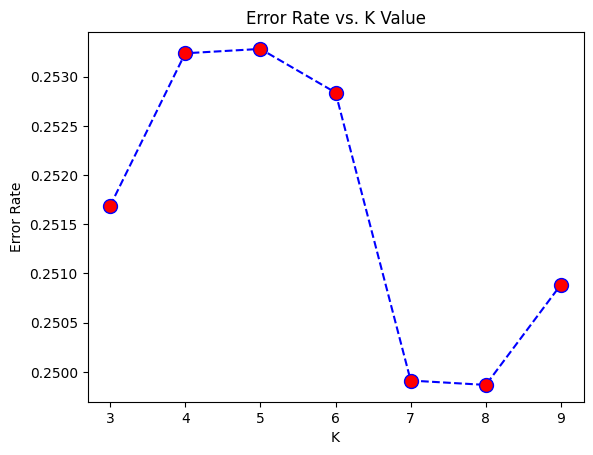

In [7]:
plt.plot(range(3, 10), error_rate, color='blue', linestyle='dashed',
        marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

min_error = min(error_rate)
min_k = error_rate.index(min_error) + 1  # Adding 1 because index starts from 0
print(f"Minimum error: {min_error} at K = {min_k}")

In [4]:
k = 8
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
class_names = np.unique(y_train)
label_map = {0: 'Normal', 1: 'DOS', 2: 'Probe', 3: 'Privilege', 4: 'Access'}

[0 1 2 3 4]


In [6]:
y_pred = knn.predict(X_test)

In [7]:
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: for k= {k}   {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

KNN Accuracy: for k= 8   0.7502

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.92      0.79      9855
           1       0.90      0.78      0.83      7460
           2       0.66      0.65      0.65      2421
           3       0.00      0.00      0.00        65
           4       0.95      0.16      0.28      2743

    accuracy                           0.75     22544
   macro avg       0.64      0.50      0.51     22544
weighted avg       0.78      0.75      0.72     22544



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


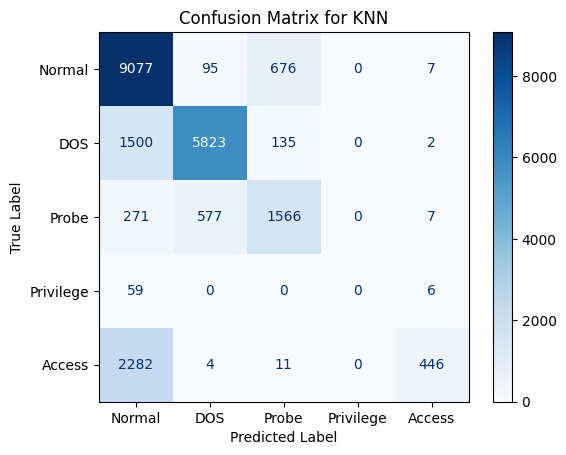

              precision    recall  f1-score   support

      Access       0.95      0.16      0.28      2743
         DOS       0.90      0.78      0.83      7460
      Normal       0.69      0.92      0.79      9855
   Privilege       0.00      0.00      0.00        65
       Probe       0.66      0.65      0.65      2421

    accuracy                           0.75     22544
   macro avg       0.64      0.50      0.51     22544
weighted avg       0.78      0.75      0.72     22544



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_map.values())  # Use label_map values for display
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

y_test_mapped = [label_map[label] for label in y_test]
y_pred_mapped = [label_map[label] for label in y_pred]
print(classification_report(y_test_mapped, y_pred_mapped))

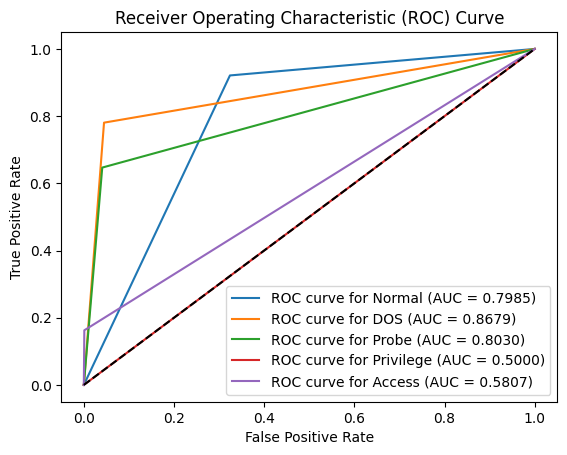

In [9]:
if len(y_test.shape) == 1:
    encoder = OneHotEncoder()
    y_test_converted = y_test.to_numpy().reshape(-1, 1)
    y_test_encoded = encoder.fit_transform(y_test_converted).toarray()
    y_pred_converted = y_pred.reshape(-1, 1)
    y_pred_encoded = encoder.transform(y_pred_converted).toarray()
else:
    y_test_encoded = y_test
    y_pred_encoded = y_pred

unique_labels = np.unique(y_test)

for label in unique_labels:
    label_index = np.where(unique_labels == label)[0][0]  # Efficiently get index from label
    fpr_i, tpr_i, _ = roc_curve(y_test_encoded[:, label_index], y_pred_encoded[:, label_index])
    roc_auc = auc(fpr_i, tpr_i)
    plt.plot(fpr_i, tpr_i, label=f'ROC curve for {label_map[label]} (AUC = {roc_auc:.4f})')  # Use label_map for labeling

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()